<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/simple_conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ruperty/pct.git

Cloning into 'pct'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 529 (delta 26), reused 31 (delta 14), pack-reused 481
Receiving objects: 100% (529/529), 178.57 KiB | 500.00 KiB/s, done.
Resolving deltas: 100% (314/314), done.


In [2]:
import pct.dl.utils as ut
import plotly.graph_objects as go
import numpy as np
import time
from tensorflow import keras
from pathlib import Path
from os import path
#from keras.preprocessing.image import load_img
import IPython.display as display

In [3]:
CONV_SIZE=5
IMG_ROWS, IMG_COLS = CONV_SIZE, CONV_SIZE # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
model_name="SingleC2D"
model_plot_filename="C2D.png"
show_shapes=True

In [4]:
def transform_weights(wts):
    main_list=[]
    for wtss in wts:
        #print(wtss)
        sub_list=[]
        for wtsss in wtss:
            #print("wtss", wtsss[0][0])
            sub_list.append(wtsss[0][0])
            
        main_list.append(sub_list)
    return np.asarray(main_list)

In [5]:
def create_model():
    sub_image = keras.layers.Input(shape=INPUT_SHAPE, name="image")
    c2d=keras.layers.Conv2D(1, (CONV_SIZE, CONV_SIZE), strides=(2, 2), use_bias=False, name="C2D")(sub_image)
    model = keras.models.Model(inputs=sub_image, outputs=c2d, name=model_name)   
    return model

In [6]:
model=create_model()
model.summary()
#keras.utils.plot_model(model, model_plot_filename, show_shapes=show_shapes) 

Model: "SingleC2D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 5, 5, 1)]         0         
_________________________________________________________________
C2D (Conv2D)                 (None, 1, 1, 1)           25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [7]:
wts = model.get_weights()
#print(wts)
wtsz = transform_weights(wts[0])
print(wtsz)

[[-0.04704693  0.03010675  0.29493713 -0.15553135  0.12394491]
 [ 0.31360674 -0.05222452  0.2637601  -0.08797544  0.28807425]
 [-0.05925456  0.14913931 -0.18339652  0.2459631  -0.05135691]
 [-0.09999205 -0.32948098 -0.19340418  0.05312937 -0.02395409]
 [-0.24036852 -0.0653328   0.1718542   0.04208297  0.31822604]]


None (400, 400) L


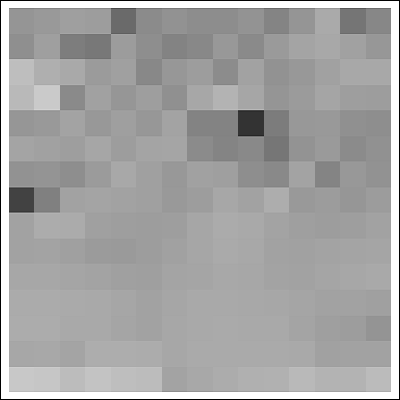

In [8]:
# input data
file_to_open = "pct/data/grey-boxes.png" 
gimg = ut.GreyImage(file_to_open)
gimg.open()
img = gimg.getImage()
# show the image
display.display(img)



In [9]:
left = 57
top = 97
right = left+CONV_SIZE
bottom = top+CONV_SIZE
img1 = img.crop((left, top, right, bottom)) 
img1=img1.convert('L')

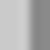

In [10]:
display.display(img1)
display.display(img1.resize((50,50)))

In [11]:
imageArray =np.asarray(img1)/255
print(imageArray)

[[0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]]


In [12]:
def train(steps, epochs):
    print("ctr loss output")
    for step in range(steps+1):
        history = model.fit(inputs, outputs, epochs=epochs, verbose=False)
        loss = history.history['loss'][-1]
        out = model(inputs).numpy()[0][0][0][0]
        print('[{:3d} {:5.2f} {:4.2f}]'.format(step*epochs, loss, out), end=" ")
        wts = model.get_weights()
        wtsz = transform_weights(wts[0])
        #print(wtsz)
        spf1.data[1].z=wtsz

In [13]:
import tensorflow as tf
reference = 9
batch_size = 500
X = tf.constant(np.array([imageArray]), dtype=tf.float32 )
Y = tf.constant(np.full((1,), reference), dtype=tf.float32 )
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 1 ).repeat( 1 ).batch( batch_size )
iterator = dataset.__iter__()
inputs , outputs = iterator.get_next()

In [14]:
print(inputs, outputs)

tf.Tensor(
[[[0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]]], shape=(1, 5, 5), dtype=float32) tf.Tensor([9.], shape=(1,), dtype=float32)


In [15]:
learning_rate=0.003
model.compile(keras.optimizers.SGD(learning_rate), loss='mse', run_eagerly=True)


In [16]:
wts = model.get_weights()
#print(wts)
initial_wtsz = transform_weights(wts[0])
print(initial_wtsz)

[[-0.04704693  0.03010675  0.29493713 -0.15553135  0.12394491]
 [ 0.31360674 -0.05222452  0.2637601  -0.08797544  0.28807425]
 [-0.05925456  0.14913931 -0.18339652  0.2459631  -0.05135691]
 [-0.09999205 -0.32948098 -0.19340418  0.05312937 -0.02395409]
 [-0.24036852 -0.0653328   0.1718542   0.04208297  0.31822604]]


In [17]:
from plotly.subplots import make_subplots
spfig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

spfig.add_trace(
    go.Surface(z=imageArray,  showscale=False),
    row=1, col=1)


spfig.add_trace(
    go.Surface(z=wtsz),
    row=1, col=2)

spfig.update_layout(
    title_text='Sub-image and Weights',
    height=600,
    width=900
)

spf1 = go.FigureWidget(spfig)
spf1

FigureWidget({
    'data': [{'scene': 'scene',
              'showscale': False,
              'type': 'surfac…

In [18]:
print("Target output is", reference)
train(60, 2)

Target output is 9
ctr loss output
[  0 63.86 1.60] [  2 46.94 2.66] [  4 34.51 3.56] [  6 25.37 4.34] [  8 18.65 5.00] [ 10 13.71 5.57] [ 12 10.08 6.06] [ 14  7.41 6.48] [ 16  5.45 6.84] [ 18  4.00 7.15] [ 20  2.94 7.41] [ 22  2.16 7.64] [ 24  1.59 7.83] [ 26  1.17 8.00] [ 28  0.86 8.14] [ 30  0.63 8.26] [ 32  0.46 8.37] [ 34  0.34 8.46] [ 36  0.25 8.54] [ 38  0.18 8.60] [ 40  0.14 8.66] [ 42  0.10 8.71] [ 44  0.07 8.75] [ 46  0.05 8.79] [ 48  0.04 8.82] [ 50  0.03 8.84] [ 52  0.02 8.86] [ 54  0.02 8.88] [ 56  0.01 8.90] [ 58  0.01 8.91] [ 60  0.01 8.93] [ 62  0.00 8.94] [ 64  0.00 8.95] [ 66  0.00 8.95] [ 68  0.00 8.96] [ 70  0.00 8.97] [ 72  0.00 8.97] [ 74  0.00 8.98] [ 76  0.00 8.98] [ 78  0.00 8.98] [ 80  0.00 8.98] [ 82  0.00 8.99] [ 84  0.00 8.99] [ 86  0.00 8.99] [ 88  0.00 8.99] [ 90  0.00 8.99] [ 92  0.00 8.99] [ 94  0.00 8.99] [ 96  0.00 9.00] [ 98  0.00 9.00] [100  0.00 9.00] [102  0.00 9.00] [104  0.00 9.00] [106  0.00 9.00] [108  0.00 9.00] [110  0.00 9.00] [112  0.00 9.

In [19]:
print(imageArray)
wts = model.get_weights()
wtsz = transform_weights(wts[0])
print("Final weights")
print(wtsz)
print("sum", np.sum(wtsz))
print("Initial weights")
print(initial_wtsz)
print("sum", np.sum(initial_wtsz))

[[0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]]
Final weights
[[0.50684094 0.58399457 0.84882504 0.22286713 0.5023435 ]
 [0.86749464 0.5016633  0.817648   0.29042286 0.6664726 ]
 [0.49463323 0.7030272  0.3704913  0.62436146 0.3270414 ]
 [0.45389572 0.22440654 0.3604836  0.43152773 0.3544442 ]
 [0.3135192  0.48855498 0.72574204 0.42048132 0.69662446]]
sum 12.797808
Initial weights
[[-0.04704693  0.03010675  0.29493713 -0.15553135  0.12394491]
 [ 0.31360674 -0.05222452  0.2637601  -0.08797544  0.28807425]
 [-0.05925456  0.14913931 -0.18339652  0.2459631  -0.05135691]
 [-0.09999205 -0.32948098 -0.19340418  0.05312937 -0.02395409]
 [-0.24036852 -0.0653328   0.1718542   0.04208297  0.31822604]]
sum 0.7055061
